In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('20220208_Final_result.csv')
raw_data.head()

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
0,9729720,APARTMENT,PENTHOUSE,179000,1140,Good,Semi equipped,1.0,Yes,9.0,No,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
1,9729785,APARTMENT,PENTHOUSE,255000,8370,Good,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
2,9729784,APARTMENT,PENTHOUSE,255000,8370,Good,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
3,9729780,APARTMENT,PENTHOUSE,620000,8370,Good,Installed,3.0,Yes,70.0,No,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
4,9727201,APARTMENT,PENTHOUSE,379000,1020,Good,USA hyper equipped,2.0,No,110.0,No,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN


In [3]:
raw_data.shape

(14541, 20)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14541 entries, 0 to 14540
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Immoweb ID            14541 non-null  int64  
 1   Property type         14541 non-null  object 
 2   property sub-type     14541 non-null  object 
 3   Price                 14541 non-null  object 
 4   Post code             14541 non-null  int64  
 5   Building condition    9615 non-null   object 
 6   Kitchen type          8587 non-null   object 
 7   Bedrooms              11778 non-null  float64
 8   Furnished             9337 non-null   object 
 9   Terrace surface       5000 non-null   float64
 10  Tenement building     13842 non-null  object 
 11  Number of frontages   9732 non-null   float64
 12  Swimming pool         4378 non-null   object 
 13  How many fireplaces?  871 non-null    float64
 14  Garden                1231 non-null   object 
 15  Terrace            

# Preprocessing

Remove nul price and change data type as float

In [5]:
raw_data = raw_data[pd.to_numeric(raw_data['Price'], errors='coerce').notnull()]
raw_data = raw_data.astype({"Price": float}, errors='raise')

Remove duplicate ID's

In [6]:
raw_data = raw_data.drop_duplicates(['Immoweb ID'], keep='last')

### Exploring the descriptive statistics of the variables

In [7]:
raw_data.describe(include='all')

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
count,1.389300e+04,13893,13893,1.389300e+04,13893.000000,9599,8575,11758.000000,9320,4992.000000,13573,9713.000000,4370,867.000000,1230,2798,6519.000000,11072.000000,2675.000000,2104
unique,NaN,2,20,NaN,NaN,6,8,NaN,2,NaN,2,NaN,2,NaN,1,1,NaN,NaN,NaN,8
top,NaN,HOUSE,VILLA,NaN,NaN,As new,Installed,NaN,No,NaN,No,NaN,No,NaN,Yes,Yes,NaN,NaN,NaN,South
freq,NaN,7699,2468,NaN,NaN,3789,4130,NaN,8730,NaN,10539,NaN,3833,NaN,1230,2798,NaN,NaN,NaN,646
mean,9.502801e+06,NaN,NaN,5.462355e+05,4694.370618,NaN,NaN,3.609117,NaN,35.219151,NaN,2.917533,NaN,1.173010,NaN,NaN,3095.344685,236.687681,1634.743925,NaN
std,3.458473e+05,NaN,NaN,6.817222e+05,3008.748453,NaN,NaN,3.663965,NaN,167.332801,NaN,0.939749,NaN,0.818414,NaN,NaN,16928.272185,314.187169,19659.610744,NaN
min,4.611027e+06,NaN,NaN,9.500000e+02,1000.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,9.473314e+06,NaN,NaN,2.400000e+05,1930.000000,NaN,NaN,2.000000,NaN,11.000000,NaN,2.000000,NaN,1.000000,NaN,NaN,255.000000,102.000000,70.000000,NaN
50%,9.615558e+06,NaN,NaN,3.550000e+05,4000.000000,NaN,NaN,3.000000,NaN,20.000000,NaN,3.000000,NaN,1.000000,NaN,NaN,722.000000,170.000000,214.000000,NaN
75%,9.686662e+06,NaN,NaN,6.000000e+05,7866.000000,NaN,NaN,4.000000,NaN,40.000000,NaN,4.000000,NaN,1.000000,NaN,NaN,1683.500000,281.000000,801.000000,NaN


### Determining the variables of interest

As Fire places and Tenement building has so many missing values, we will drop these columns. We can apply the same for the Garden surface but instead of drop this column we will replace it with new feature (Region)

We also do not use Garden & Terrace surface. These columns will be drop after handeling missing values.

In [8]:
df = raw_data.drop(columns =['Tenement building', 'How many fireplaces?'])

### Dealing with missing values

In [9]:
df.isnull().sum().sort_values(ascending=0)

Garden                 12663
Garden orientation     11789
Garden surface         11218
Terrace                11095
Swimming pool           9523
Terrace surface         8901
Surface of the plot     7374
Kitchen type            5318
Furnished               4573
Building condition      4294
Number of frontages     4180
Living area             2821
Bedrooms                2135
Property type              0
Post code                  0
Price                      0
property sub-type          0
Immoweb ID                 0
dtype: int64

#### Building Condition

In [10]:
df['Building condition'].value_counts()
df['Building condition'].unique()

array(['Good', nan, 'As new', 'To renovate', 'To be done up',
       'Just renovated', 'To restore'], dtype=object)

In [11]:
building_condition_map = {'As new': 6, 'Just renovated': 5, 'Good': 4, 'To be done up': 3, 'To renovate':2, 'To restore':1}
df = df.applymap(lambda s: building_condition_map.get(s) if s in building_condition_map else s)

df['Building condition'] = df['Building condition'].fillna(2)
df['Building condition'].isnull().sum()

0

#### Kitchen Type

In [12]:
Kit_type_dict = {"USA uninstalled" : 0, 
                 "Not installed" : 0, 
                 "Installed": 1, 
                 "USA installed": 1,
                 "Semi equipped": 1,
                 "USA semi equipped": 1,
                 "Hyper equipped": 2,
                 "USA hyper equipped": 2
                }

df = df.replace(Kit_type_dict)
df["Kitchen type"] = df["Kitchen type"].fillna(0)

#### Furnished

Fill missing values

In [13]:
df['Furnished'] = df['Furnished'].fillna("No")
df['Furnished'] = df['Furnished'].apply(lambda v: 0 if v == "No" else 1)

#### Bedrooms

Fill missing values with 2 bedrooms

In [14]:
df['Bedrooms'] = df['Bedrooms'].fillna(2).astype(int)

#### Swimming Pool

In [15]:
# Fill missing values with value 0
df['Swimming pool'].fillna(0, inplace = True)
df['Swimming pool'] = df['Swimming pool'].apply(lambda v: 0 if v == "No" else 1)
df['Swimming pool'].isnull().sum()

0

#### Surface of the plot

In [16]:
# Fill empty values with 0
df['Surface of the plot'].fillna(0, inplace = True)

#### Living area

#### Fill missing values in Living area row

In [17]:
def fill_living_area(col):  
    if col['Living area'] > 0:
        return col['Living area']
    else: 
        if col['property sub-type'] == 'APARTMENT':
            return 95.0
        else:
            return 150.0


df['Living area'] = df.apply(lambda col: fill_living_area(col), axis=1)

#### Number of Frontages

In [18]:
#get ['number of frontages'] with values and calc mean
selected_rows = df[~df['Number of frontages'].isnull()]
mean_num_of_frontages = selected_rows['Number of frontages'].mean(axis=0).round(0)
mean_num_of_frontages

3.0

In [19]:
# fill mean value to missing value
df['Number of frontages'] = df['Number of frontages'].fillna(mean_num_of_frontages)
# changing data type as int
df['Number of frontages'] = df['Number of frontages'].astype(int)

#### Garden/Garden Surface & Terrace/Surface

In [20]:
df['Garden'] = df['Garden'].fillna(df['Garden surface'].notnull())
def conv(value : str) -> int:
    if value == False: 
        return 0
    elif value == True:
        return 1
    else:
        return 1

df['Garden'] = df['Garden'].apply(conv)


In [21]:
df['Terrace'] = df['Terrace'].fillna(df['Terrace surface'].notnull())
df['Terrace'] = df['Terrace'].apply(conv)

In [22]:
# As it was mentioned before these columns will not be used for further analysis
df = df.drop(columns =['Garden surface', 'Terrace surface'])

### Creating new Columns

#### Price per m2

In [23]:
df['price/m2'] = (df['Price']/ df['Living area']).round(2)
df.head()

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,Garden orientation,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,3,1,0,1,0.0,63.0,NaN,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2,1,0,1,0.0,42.0,NaN,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2,1,0,1,0.0,42.0,NaN,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2,1,0,1,0.0,150.0,NaN,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,0,3,0,0,1,0.0,120.0,NaN,3158.33


### Region

In [24]:
df = df.rename(columns={"Garden orientation":"Region"})
for x in df:
    if x == "Post code":
        for code in df[x]:
            if code >= 1000 and code <= 1299:
                df.loc[df["Post code"] == code, "Region"] = "Brussels Capital"
            if code >= 1300 and code <= 1499:
                df.loc[df["Post code"] == code, "Region"] = "Walloon Brabant"
            if code >= 1500 and code <= 1999:
                df.loc[df["Post code"] == code, "Region"] = "Flemish Brabant"
            if code >= 2000 and code <= 2999:
                df.loc[df["Post code"] == code, "Region"] = "Antwerp"
            if code >= 3000 and code <= 3499:
                df.loc[df["Post code"] == code, "Region"] = "Flemish Brabant"
            if code >= 3500 and code <= 3999:
                df.loc[df["Post code"] == code, "Region"] = "Limburg"
            if code >= 4000 and code <= 4999:
                df.loc[df["Post code"] == code, "Region"] = "Liège"
            if code >= 5000 and code <= 5999:
                df.loc[df["Post code"] == code, "Region"] = "Namur"
            if code >= 6000 and code <= 6599:
                df.loc[df["Post code"] == code, "Region"] = "Hainaut"
            if code >= 6600 and code <= 6999:
                df.loc[df["Post code"] == code, "Region"] = "Luxembourg"
            if code >= 7000 and code <= 7999:
                df.loc[df["Post code"] == code, "Region"] = "Hainaut"
            if code >= 8000 and code <= 8999:
                df.loc[df["Post code"] == code, "Region"] = "West Flanders"
            if code >= 9000 and code <= 9999:
                df.loc[df["Post code"] == code, "Region"] = "East Flanders"

In [25]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Immoweb ID,Immoweb ID,0.0
Property type,Property type,0.0
property sub-type,property sub-type,0.0
Price,Price,0.0
Post code,Post code,0.0
Building condition,Building condition,0.0
Kitchen type,Kitchen type,0.0
Bedrooms,Bedrooms,0.0
Furnished,Furnished,0.0
Number of frontages,Number of frontages,0.0


In [26]:
df.describe()

,Immoweb ID,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
count,1.389300e+04,1.389300e+04,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000
mean,9.502801e+06,5.462355e+05,4694.370618,3.764342,0.769308,3.361837,0.042467,2.942345,0.724106,0.281077,0.560714,1452.425826,219.085583,2914.618426
std,3.458473e+05,6.817222e+05,3008.748453,1.636409,0.744092,3.420270,0.201660,0.786659,0.446980,0.449541,0.496318,11697.894538,282.638097,3639.447352
min,4.611027e+06,9.500000e+02,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.330000
25%,9.473314e+06,2.400000e+05,1930.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,117.000000,1680.790000
50%,9.615558e+06,3.550000e+05,4000.000000,4.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,150.000000,2417.340000
75%,9.686662e+06,6.000000e+05,7866.000000,6.000000,1.000000,4.000000,0.000000,4.000000,1.000000,1.000000,1.000000,649.000000,245.000000,3344.520000
max,9.731707e+06,3.500000e+07,9992.000000,6.000000,2.000000,204.000000,1.000000,16.000000,1.000000,1.000000,1.000000,580608.000000,11000.000000,233333.330000


In [27]:
corr_df = df.drop(columns=['Immoweb ID', 'Post code', 'Price']) 
a= corr_df.corr(method = 'spearman', min_periods = 1)
a

,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
Building condition,1.000000,0.406656,0.039347,0.091877,0.016103,-0.232671,0.096456,0.264952,0.007417,-0.020284,0.251886
Kitchen type,0.406656,1.000000,0.103106,0.033100,0.054108,-0.191978,0.159075,0.329074,0.058967,0.026371,0.202365
Bedrooms,0.039347,0.103106,1.000000,-0.076761,0.186555,0.051576,0.211549,0.095817,0.568591,0.691631,-0.130173
Furnished,0.091877,0.033100,-0.076761,1.000000,-0.067666,-0.091217,-0.030043,0.001567,-0.078378,-0.129559,0.113427
Number of frontages,0.016103,0.054108,0.186555,-0.067666,1.000000,0.085426,0.140481,0.063247,0.442866,0.213623,-0.007264
Swimming pool,-0.232671,-0.191978,0.051576,-0.091217,0.085426,1.000000,-0.103759,-0.141403,0.095626,0.085593,-0.167634
Garden,0.096456,0.159075,0.211549,-0.030043,0.140481,-0.103759,1.000000,0.159512,0.314486,0.187832,-0.009589
Terrace,0.264952,0.329074,0.095817,0.001567,0.063247,-0.141403,0.159512,1.000000,0.046891,0.011194,0.183981
Surface of the plot,0.007417,0.058967,0.568591,-0.078378,0.442866,0.095626,0.314486,0.046891,1.000000,0.595009,-0.150818
Living area,-0.020284,0.026371,0.691631,-0.129559,0.213623,0.085593,0.187832,0.011194,0.595009,1.000000,-0.356420


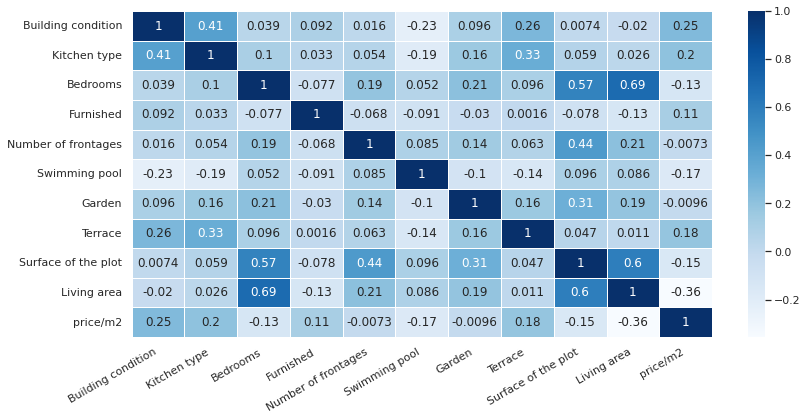

In [28]:
plt.figure(figsize=(13, 6))
sns.heatmap(a, vmax=1, annot=True, linewidths=.5,  cmap="Blues")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()



### Dealing with Outliers

#### Price

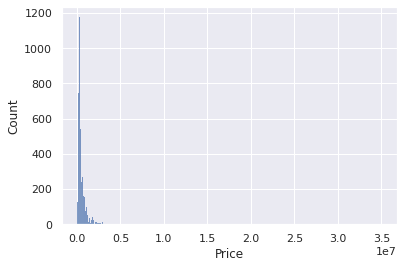

In [29]:
sns.histplot(df['Price']);

In [30]:
# Obviously there are some outliers present, we can deal with the problem by removing 0.5%, or 1% of the problematic samples
# The outliers are situated around the higher prices (right side of the graph)

# Outliers are a great issue for OLS(Ordinary Least Squares regression), thus we must deal with them in some way

# This variable is equal to the 99th percentile of the 'Price' variable
q = df['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df[df['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,Region,price/m2
count,1.375100e+04,13751,13751,1.375100e+04,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751.000000,13751,13751.000000
unique,NaN,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN
top,NaN,HOUSE,VILLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Antwerp,NaN
freq,NaN,7572,2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN
mean,9.504520e+06,NaN,NaN,5.037515e+05,4705.970548,3.757545,0.768671,3.297724,0.042470,2.936805,0.724238,0.281216,0.559450,1158.464548,212.774198,NaN,2810.382808
std,3.430954e+05,NaN,NaN,4.461930e+05,3006.751236,1.634351,0.742631,2.977993,0.201665,0.777131,0.446914,0.449609,0.496471,7166.296102,261.194275,NaN,2704.435868
min,4.611027e+06,NaN,NaN,9.500000e+02,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,6.330000
25%,9.475254e+06,NaN,NaN,2.400000e+05,1933.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,116.000000,NaN,1666.670000
50%,9.616501e+06,NaN,NaN,3.500000e+05,4000.000000,4.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,150.000000,NaN,2403.850000
75%,9.686911e+06,NaN,NaN,5.950000e+05,7870.000000,6.000000,1.000000,4.000000,0.000000,4.000000,1.000000,1.000000,1.000000,633.000000,240.000000,NaN,3322.220000


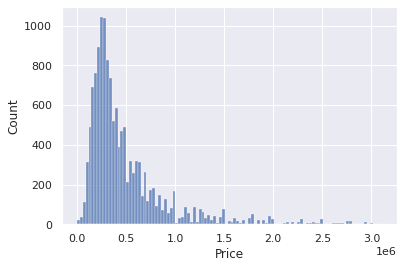

In [31]:

sns.histplot(data_1['Price']);

#### Living area

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


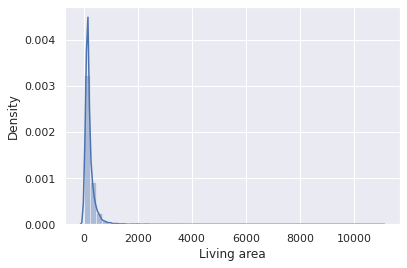

In [32]:
sns.distplot(df['Living area']);

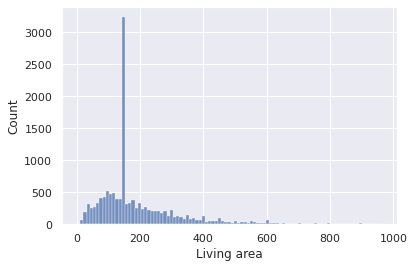

In [33]:
q = data_1['Living area'].quantile(0.99)
data_2 = data_1[data_1['Living area']< q]
sns.histplot(data_2['Living area']);

#### Surface of the plot

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


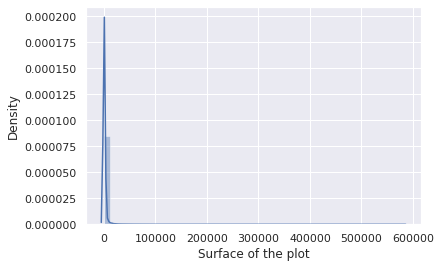

In [34]:
sns.distplot(df['Surface of the plot']);

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


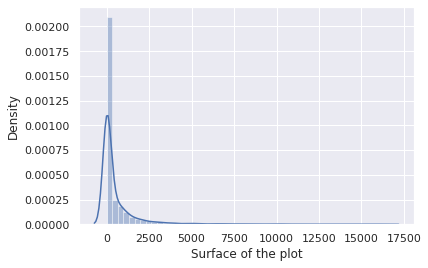

In [35]:
q = data_2['Surface of the plot'].quantile(0.99)
data_3 = data_2[data_2['Surface of the plot']< q]
sns.distplot(data_3['Surface of the plot']);

#### Number of frontages

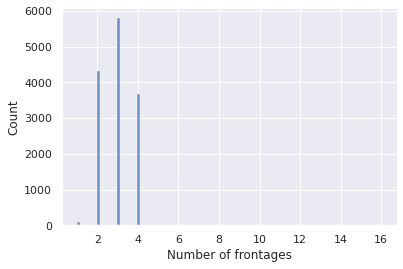

In [36]:
sns.histplot(df['Number of frontages']);

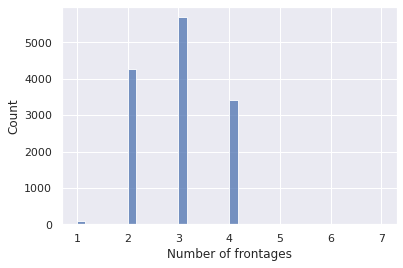

In [37]:
q = data_3['Number of frontages'].quantile(0.99)
data_4 = data_3[data_3['Number of frontages']< q]
sns.histplot(data_3['Number of frontages']);

#### Bedrooms

/home/dilsad/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


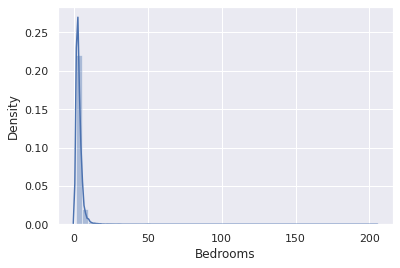

In [38]:
sns.distplot(df['Bedrooms']);

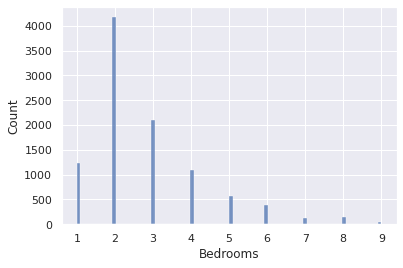

In [39]:
q = data_4['Bedrooms'].quantile(0.99)
data_5 = data_4[data_4['Bedrooms']< q]
sns.histplot(data_5['Bedrooms']);

In [40]:
data_cleaned = data_5.reset_index(drop=True)
data_cleaned.describe(include='all')

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,Region,price/m2
count,9.898000e+03,9898,9898,9.898000e+03,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898,9898.000000
unique,NaN,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN
top,NaN,APARTMENT,DUPLEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brussels Capital,NaN
freq,NaN,5673,1493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1778,NaN
mean,9.490321e+06,NaN,NaN,4.257984e+05,4630.575066,3.691251,0.711962,2.824308,0.046777,2.558396,0.707012,0.229541,0.522833,233.937361,172.227925,NaN,2808.458168
std,3.635356e+05,NaN,NaN,3.695495e+05,3078.165118,1.640908,0.738237,1.528004,0.211172,0.516353,0.455156,0.420559,0.499504,891.004039,119.203612,NaN,1908.224163
min,4.611027e+06,NaN,NaN,9.500000e+02,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,NaN,6.330000
25%,9.455963e+06,NaN,NaN,2.200000e+05,1800.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,103.000000,NaN,1660.000000
50%,9.614176e+06,NaN,NaN,3.060115e+05,3840.000000,4.000000,1.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,150.000000,NaN,2416.785000
75%,9.686348e+06,NaN,NaN,4.950000e+05,8300.000000,6.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,150.000000,197.000000,NaN,3369.570000


In [41]:
axis_name = ['Building condition',
 'Kitchen type',
 'Bedrooms',
 'Number of frontages',
 'Surface of the plot',
 'Living area']

Text(0.5, 1.0, 'Price and Surface of the plot')

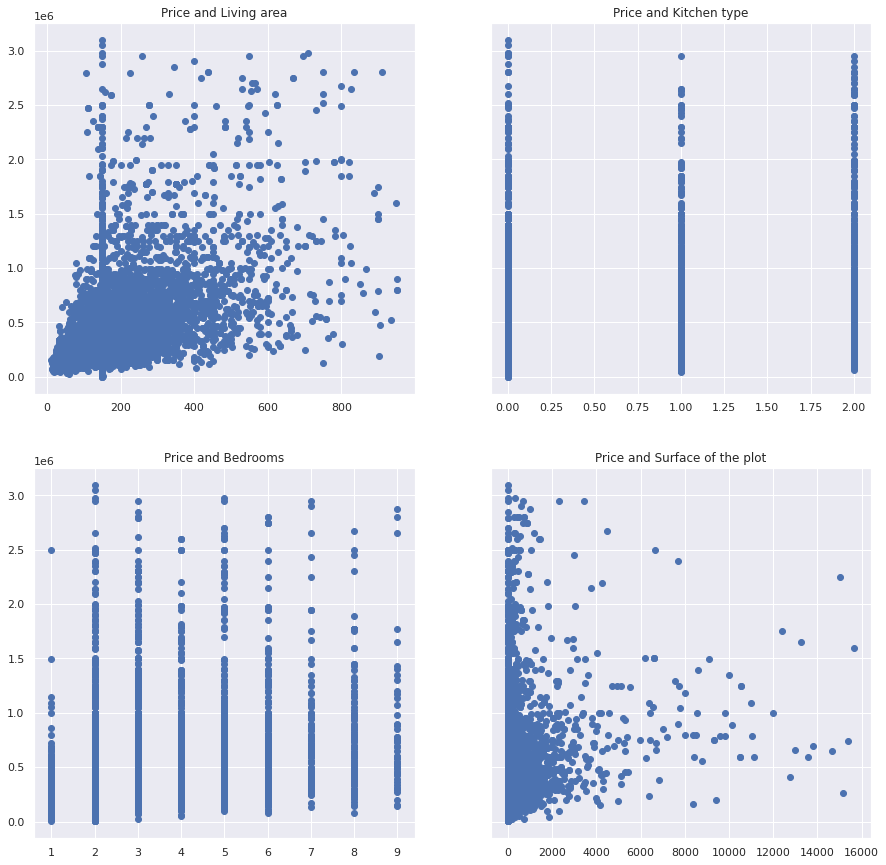

In [42]:
f, axs = plt.subplots(2, 2, sharey=True, figsize =(15,15)) #sharey -> share 'Price' as y
axs[0, 0].scatter(data_cleaned['Living area'],data_cleaned['Price'])
axs[0, 0].set_title('Price and Living area')
axs[0, 1].scatter(data_cleaned['Kitchen type'],data_cleaned['Price'])
axs[0, 1].set_title('Price and Kitchen type')
axs[1, 0].scatter(data_cleaned['Bedrooms'],data_cleaned['Price'])
axs[1, 0].set_title('Price and Bedrooms')
axs[1, 1].scatter(data_cleaned['Surface of the plot'],data_cleaned['Price'])
axs[1, 1].set_title('Price and Surface of the plot')



### Multicolineratiy

In [43]:
data_cleaned.columns.values

array(['Immoweb ID', 'Property type', 'property sub-type', 'Price',
       'Post code', 'Building condition', 'Kitchen type', 'Bedrooms',
       'Furnished', 'Number of frontages', 'Swimming pool', 'Garden',
       'Terrace', 'Surface of the plot', 'Living area', 'Region',
       'price/m2'], dtype=object)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Building condition', 'Kitchen type', 'Bedrooms',
       'Furnished', 'Number of frontages', 'Swimming pool', 'Garden',
       'Terrace', 'Surface of the plot', 'Living area']]
vif = pd.DataFrame() 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [45]:
vif

,VIF,Features
0,6.870743,Building condition
1,2.578113,Kitchen type
2,6.423138,Bedrooms
3,1.077796,Furnished
4,9.048778,Number of frontages
5,3.496279,Swimming pool
6,1.419467,Garden
7,2.422607,Terrace
8,1.198028,Surface of the plot
9,4.947799,Living area


In [46]:
data_no_multicollinearity = data_cleaned.drop(['Number of frontages'],axis=1)
data_no_multicollinearity

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Swimming pool,Garden,Terrace,Surface of the plot,Living area,Region,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,1,0,1,0.0,63.0,Brussels Capital,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,1,0,1,0.0,42.0,West Flanders,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,1,0,1,0.0,42.0,West Flanders,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,1,0,1,0.0,150.0,West Flanders,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,0,0,0,1,0.0,120.0,Brussels Capital,3158.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,9463951,APARTMENT,SERVICE_FLAT,250200.0,2320,2.0,0.0,1,0,1,0,0,0.0,150.0,Antwerp,1668.00
9894,9463953,APARTMENT,SERVICE_FLAT,204760.0,2870,2.0,0.0,1,0,1,0,0,0.0,150.0,Antwerp,1365.07
9895,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,0,1,0,0,0.0,150.0,Flemish Brabant,880.00
9896,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,0,1,0,1,0.0,150.0,Flemish Brabant,1180.00


### Categorical data encoding

In [47]:
data_no_pro_type = data_no_multicollinearity.drop(columns=['Immoweb ID', 'Property type'])

In [48]:

data_with_dummies = pd.get_dummies(data_no_pro_type, drop_first=True)

In [49]:
data_with_dummies.head()

,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Swimming pool,Garden,Terrace,Surface of the plot,...,Region_Brussels Capital,Region_East Flanders,Region_Flemish Brabant,Region_Hainaut,Region_Limburg,Region_Liège,Region_Luxembourg,Region_Namur,Region_Walloon Brabant,Region_West Flanders
0,179000.0,1140,4.0,1.0,1,1,1,0,1,0.0,...,1,0,0,0,0,0,0,0,0,0
1,255000.0,8370,4.0,1.0,1,1,1,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
2,255000.0,8370,4.0,1.0,1,1,1,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
3,620000.0,8370,4.0,1.0,3,1,1,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
4,379000.0,1020,4.0,2.0,2,0,0,0,1,0.0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
data_with_dummies.columns.values

array(['Price', 'Post code', 'Building condition', 'Kitchen type',
       'Bedrooms', 'Furnished', 'Swimming pool', 'Garden', 'Terrace',
       'Surface of the plot', 'Living area', 'price/m2',
       'property sub-type_BUNGALOW', 'property sub-type_CASTLE',
       'property sub-type_CHALET', 'property sub-type_COUNTRY_COTTAGE',
       'property sub-type_DUPLEX',
       'property sub-type_EXCEPTIONAL_PROPERTY',
       'property sub-type_FARMHOUSE', 'property sub-type_FLAT_STUDIO',
       'property sub-type_GROUND_FLOOR', 'property sub-type_KOT',
       'property sub-type_LOFT', 'property sub-type_MANOR_HOUSE',
       'property sub-type_MANSION',
       'property sub-type_MIXED_USE_BUILDING',
       'property sub-type_PENTHOUSE', 'property sub-type_SERVICE_FLAT',
       'property sub-type_TOWN_HOUSE', 'property sub-type_TRIPLEX',
       'property sub-type_VILLA', 'Region_Brussels Capital',
       'Region_East Flanders', 'Region_Flemish Brabant', 'Region_Hainaut',
       'Region_Limburg'

In [51]:
cols = ['Price', 'Living area', 'price/m2', 'Surface of the plot', 'Building condition', 'Kitchen type',
       'Bedrooms', 'Furnished', 'Swimming pool', 'Garden', 'Terrace',
       'property sub-type_BUNGALOW', 'property sub-type_CASTLE',
       'property sub-type_CHALET', 'property sub-type_COUNTRY_COTTAGE',
       'property sub-type_DUPLEX',
       'property sub-type_EXCEPTIONAL_PROPERTY',
       'property sub-type_FARMHOUSE', 'property sub-type_FLAT_STUDIO',
       'property sub-type_GROUND_FLOOR', 'property sub-type_KOT',
       'property sub-type_LOFT', 'property sub-type_MANOR_HOUSE',
       'property sub-type_MANSION',
       'property sub-type_MIXED_USE_BUILDING',
       'property sub-type_PENTHOUSE', 'property sub-type_SERVICE_FLAT',
       'property sub-type_TOWN_HOUSE', 'property sub-type_TRIPLEX',
       'Post code',
       'property sub-type_VILLA', 'Region_Brussels Capital',
       'Region_East Flanders', 'Region_Flemish Brabant', 'Region_Hainaut',
       'Region_Limburg', 'Region_Liège', 'Region_Luxembourg',
       'Region_Namur', 'Region_Walloon Brabant', 'Region_West Flanders']

In [52]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Price,Living area,price/m2,Surface of the plot,Building condition,Kitchen type,Bedrooms,Furnished,Swimming pool,Garden,...,Region_Brussels Capital,Region_East Flanders,Region_Flemish Brabant,Region_Hainaut,Region_Limburg,Region_Liège,Region_Luxembourg,Region_Namur,Region_Walloon Brabant,Region_West Flanders
0,179000.0,63.0,2841.27,0.0,4.0,1.0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1,255000.0,42.0,6071.43,0.0,4.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,255000.0,42.0,6071.43,0.0,4.0,1.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,620000.0,150.0,4133.33,0.0,4.0,1.0,3,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,379000.0,120.0,3158.33,0.0,4.0,2.0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Linear Regression Model

Declare the features and targets

In [70]:
X = data_preprocessed.drop(['Price'], axis =1)
y = data_preprocessed['Price']

### Standardization and Scaling

In [71]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X)

StandardScaler()

In [58]:
features_scal = scaler.transform(X)

### Splitting the data set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state=0)

In [73]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.8392104127368961

In [74]:
y_hat = regressor.predict(X_train)

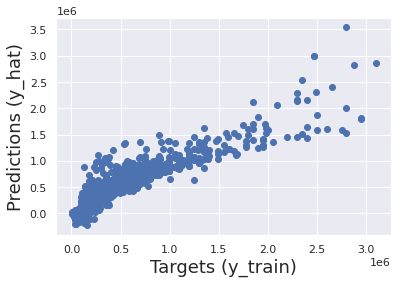

In [75]:
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

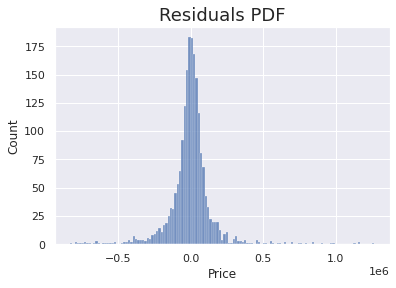

In [76]:
# We can plot the PDF(Probability density function) of the residuals and check for anomalies
sns.histplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [77]:
regressor.score(X_test, y_test)

0.8091405507986092

In [78]:
regressor.intercept_

-238250.63658825663

In [86]:
regressor.coef_

array([ 1.9142600e+03,  1.3746000e+02,  1.3660000e+01,  5.6856900e+03,
       -1.1637240e+04,  1.5266740e+04, -7.6612110e+04,  8.2804500e+03,
       -1.9258320e+04, -2.5224700e+03,  2.5851920e+04, -0.0000000e+00,
        7.9668930e+04,  4.0010370e+04,  1.9275250e+04,  5.9391390e+04,
       -2.0164736e+05, -1.4753721e+05, -7.4273200e+03, -2.2169082e+05,
        4.0873910e+04,  1.0322665e+05,  6.7707460e+04, -2.3600160e+04,
        3.9491880e+04, -6.7346480e+04,  1.9096000e+04,  4.8498270e+04,
       -3.3720000e+01,  8.3054780e+04, -1.9151880e+04,  1.9634726e+05,
       -3.8865710e+04,  8.2159230e+04,  2.6813460e+04,  2.2239190e+04,
        4.5092200e+03,  6.6602310e+04, -3.6017610e+04,  1.6654287e+05])

In [84]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = regressor.coef_
reg_summary

,Features,Weights
0,Living area,1.914265e+03
1,price/m2,1.374631e+02
2,Surface of the plot,1.366120e+01
3,Building condition,5.685689e+03
4,Kitchen type,-1.163724e+04
5,Bedrooms,1.526674e+04
6,Furnished,-7.661211e+04
7,Swimming pool,8.280450e+03
8,Garden,-1.925832e+04
9,Terrace,-2.522470e+03


In [91]:
y_hat_test = regressor.predict(X_test)

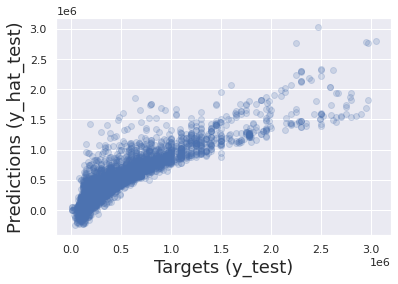

In [93]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()